
Linear regressions are ultimately just algebra. In algebra, a big part of it was understanding how $x$ influences $y$. This is what we would find when finding the slope of a line.

C:\Users\dhummel\AppData\Local\Temp\ipykernel_19960\3231877111.py:29: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r'$\Delta x$', xy=((x1 + x2) / 2, y1 - 0.5), textcoords='offset points', ha='center', color='red')
C:\Users\dhummel\AppData\Local\Temp\ipykernel_19960\3231877111.py:30: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r'$\Delta y$', xy=(x2 + 0.5, (y1 + y2) / 2), textcoords='offset points', ha='center', color='red')


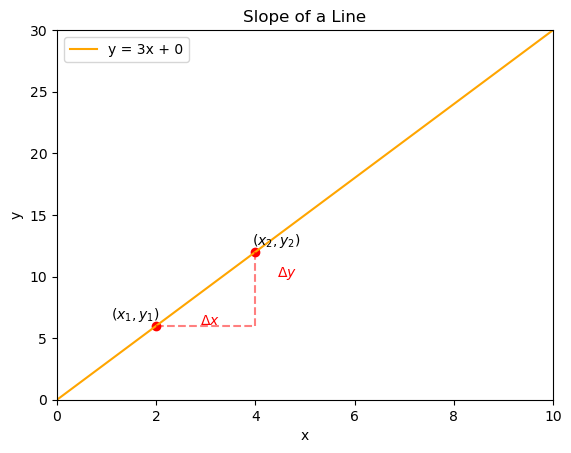

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define the data
x = np.linspace(0, 10, 400)
slope = 3
intercept = 0
y = intercept + slope * x

# Define the points (x1, y1) and (x2, y2) for the delta lines
x1, y1 = 2, slope * 2
x2, y2 = 4, slope * 4

# Create the plot
fig, ax = plt.subplots()

# Plot the line
ax.plot(x, y, label=f'y = {slope}x + {intercept}', color='orange')

# Plot the points (x1, y1) and (x2, y2)
ax.scatter([x1, x2], [y1, y2], color='red')

# Plot the delta x and delta y lines
ax.plot([x1, x2], [y1, y1], 'r--', alpha=0.5)  # Horizontal line (Δx)
ax.plot([x2, x2], [y1, y2], 'r--', alpha=0.5)  # Vertical line (Δy)

# Add delta x and delta y labels
ax.annotate(r'$\Delta x$', xy=((x1 + x2) / 2, y1 - 0.5), textcoords='offset points', ha='center', color='red')
ax.annotate(r'$\Delta y$', xy=(x2 + 0.5, (y1 + y2) / 2), textcoords='offset points', ha='center', color='red')

# Label the points (x1, y1) and (x2, y2)
ax.annotate(r'$(x_1, y_1)$', xy=(x1, y1), textcoords='offset points', xytext=(-15, 5), ha='center')
ax.annotate(r'$(x_2, y_2)$', xy=(x2, y2), textcoords='offset points', xytext=(15, 5), ha='center')

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Slope of a Line')

# Set x and y limits to positive values only
ax.set_xlim([0, 10])
ax.set_ylim([0, slope*10])

# Add legend
ax.legend()

# Show the plot
plt.show()



Here we can see how y changes (varies) as x changes (varies). This is what we called the slope:

$$\beta=\frac{\Delta y}{\Delta x}$$



But how can we actually use this? Well, let's consider a case where we have a claim where the only thing that affects their cost is how many times they fill a certain prescription.

$$total \: cost=\frac{cost}{fill}\cdot fills$$



This would mean that even if we did not know the price of the drug, we could figure it out, even if we only had the total cost and total number of fills.

$$total \: cost=\frac{cost}{fills}\cdot fills$$
$$\frac{total \: cost}{fills}=\frac{cost}{fill}$$


Which with actual numbers would mean:

$$80=\frac{cost}{fills}\cdot 4$$
$$\frac{80}{4}=20=\frac{cost}{fill}$$


But we know many thinsg can influence an outcome. So if that person had two prescriptions, then:



$$total \: cost=\frac{cost_1}{fill_1}\cdot fills_1+\frac{cost_2}{fill_2}\cdot fills_2$$




Well if we didn't know the cost of each of these prescriptions, we would need at least two different observations for them to figure out their costs. So if we looked at their bill in June and July and see:

$$100=4\frac{cost_1}{fill_1}+1 \frac{cost_2}{fill_2}$$

and 


$$120=4\frac{cost_1}{fill_1}+2 \frac{cost_2}{fill_2}$$



To simplify the language here, we can use the slope notation that we had before, so $\frac{cost_1}{fill_1}=\beta_1$, etc. making:

$$100=4\beta_1+1 \beta_2$$


$$120=4\beta_1+2 \beta_2$$


So we know we would need to solve one equation to get one variable in terms of the other


$$100-4\beta_1$$


, and then plug that into the other equation.....


$$120=4\beta_1+2(100-4\beta_1)$$
$$120=4\beta_1+200-8\beta_1$$
$$4\beta_1=80$$
$$\beta_1=20$$

Which we plug back into the original equation to get:

$$\beta_2=100-4\beta_1=100-4(20)=20$$



So with 1 equation and 1 unknown, it was 1 step. With 2 equations and 2 unknowns, we get many more steps. This continues exponentially as we add more equations and more unknowns. **So what can we do?**




To figure that out, we can revisit the case with one variable. We said if we want to know the slope, we would do:

$$y=x \beta$$
$$\beta=\frac{y}{x}$$

But this skips some steps. We actually divide each side by x:

$$\frac{1}{x}\beta x=y\frac{1}{x}$$



But dividing by a number is the same as multiplying by that number to the negative 1 power, meaning:


$$\frac{1}{x}\beta x=y\frac{1}{x} \implies x^{-1}\beta x=x^{-1}y$$


This gives $\beta=x^{-1}y$ since **$x^{-1}x=1$**.


So how does that helps us? Well we are actually able to write out multiple equations in a way that can do that, which means we can write our equations:

$$100=4\beta_1+1 \beta_2$$


$$120=4\beta_1+2 \beta_2$$



can be written in matrix notation as:
$$
\overset{y}{\begin{bmatrix}
    100 \\
    120
\end{bmatrix}}
=
\overset{X}{\begin{bmatrix}
    4 & 1 \\
    4 & 2
\end{bmatrix}}
\overset{\beta}{\begin{bmatrix}
    \beta_1 \\
    \beta_2
\end{bmatrix}}
$$




So now whether we have 1 equation and 1 unknown, or 50 equations and 50 unknowns, we can write them as:


$\beta=x^{-1}y$



# Matrix multiplication


But let's look at our matrix. Since we said:

$$
\begin{aligned}
    &\begin{aligned}
        100 &= 4\beta_1 + 1\beta_2 \\
        120 &= 4\beta_1 + 2\beta_2
    \end{aligned}
    & \implies
    & \begin{bmatrix}
        100 \\
        120
    \end{bmatrix}
    =
    \begin{bmatrix}
        4 & 1 \\
        4 & 2
    \end{bmatrix}
    \begin{bmatrix}
        \beta_1 \\
        \beta_2
    \end{bmatrix}
\end{aligned}
$$




**This is where the explanation starts to get a little too loose. Tighten it up a bit**

This means that we do a dot product where each row of $x$ has a dot product with the column of B.




$$
\begin{aligned}
    &\begin{aligned}
        100 &= 4\beta_1 + 1\beta_2 \\
        120 &= 4\beta_1 + 2\beta_2
    \end{aligned}
    & \implies
    & \begin{bmatrix}
        \color{red}{100} \\
        120
    \end{bmatrix}
    =
    \begin{bmatrix}
        \color{blue}{4} & \color{blue}{1} \\
        4 & 2
    \end{bmatrix}
    \begin{bmatrix}
        \color{green}{\beta_1} \\
        \color{green}{\beta_2}
    \end{bmatrix}
\end{aligned}
$$

Below, we highlight the matrix multiplication step-by-step:

$$
\begin{bmatrix}
    \color{red}{100} \\
    120
\end{bmatrix}
=
\begin{bmatrix}
    \color{blue}{4} & \color{blue}{1} \\
    4 & 2
\end{bmatrix}
\begin{bmatrix}
    \color{green}{\beta_1} \\
    \color{green}{\beta_2}
\end{bmatrix}
$$

Here, <span style="color:red;">100</span> is the dot product of the first row of <span style="color:blue;">X = [4, 1]</span> and the column of <span style="color:green;">β = [β<sub>1</sub>, β<sub>2</sub>]</span>:

$$
\color{red}{100} = \color{blue}{4} \cdot \color{green}{\beta_1} + \color{blue}{1} \cdot \color{green}{\beta_2}
$$

Likewise, \(\color{red}{120}\) is the dot product of the second row of <span style="color:blue;">X = [4, 2]</span> and the column of <span style="color:green;">β = [β<sub>1</sub>, β<sub>2</sub>]</span>:

$$
\color{red}{120} = \color{blue}{4} \cdot \color{green}{\beta_1} + \color{blue}{2} \cdot \color{green}{\beta_2}
$$




This means to be able to do matrix multiplication, we need the same number of columns in $X$ as rows in $\beta$. We write the dimensions of a matrix like so:


To perform matrix multiplication, the number of columns in matrix $X$ must be equal to the number of rows in vector $\beta$. This requirement ensures that each element in the resulting product is a sum of products, calculated by taking the dot product of rows from $X$ with columns from $\beta$.

We write the dimensions of a matrix as follows:

- $X$ is an $n \times k$ matrix, where $n$ is the number of observations (rows) and $k$ is the number of predictors including the intercept term (columns).
- $\beta$ is a $k \times 1$ vector.
- The resulting product $y$ is an $n \times 1$ vector.

Here’s how we denote the dimensions:

$$
\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
\end{bmatrix}_{n \times 1}
=
\begin{bmatrix}
    x_{11} & x_{12} & \cdots & x_{1k} \\
    x_{21} & x_{22} & \cdots & x_{2k} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \cdots & x_{nk}
\end{bmatrix}_{n \times k}
\begin{bmatrix}
    \beta_1 \\
    \beta_2 \\
    \vdots \\
    \beta_k
\end{bmatrix}_{k \times 1}
$$







### Dimensions of Matrices in Matrix Multiplication

In matrix algebra, the order of multiplication matters. Specifically, the number of columns in $X$ must equal the number of rows in $\beta$. We can visualize this by writting the dimensions, such as $X$ which has $n$ rows, and $k$ columns as:


$$
\begin{array}{c}
 & X  \\
& \left[ n \times k \right]\\
\end{array}
$$



And since the number of columns in $X$ must equal the number of rows in $\beta$, that means that when we write an equation, the inner dimensions much match. And the result takes the outter dimensions.


$$
\begin{array}{cccc}
\ & y & = & X \beta \\
& \left[ \color{red}{n} \times \color{red}{1} \right] & & \left[ \color{red}{n} \times \color{blue}{k} \right] \cdot \left[ \color{blue}{k} \times \color{red}{1} \right] \\
\end{array}
$$









# Inverse Rules

So the equation $\beta=\frac{y}{x}$ again skips steps. The steps are actually

We said that $x^{-1}x=1$. The term $x^{-1}$ is known as the inverse of $x$. We won't get into why, but the inverse of a matrix is only defined is that matrix is square. Which means if $x$ has the following dimensions:

$$
\begin{array}{c}
 & X  \\
& \left[ n \times k \right]\\
\end{array}
$$

Then $n$ needs to equal $k$ to be invertible.


So why do we care about that? Well if we think about our data, we could have 1,000,000 observations, and only 50 things that effect our cost. This would mean that our matrix of coefficients would be:

$$
\begin{array}{c}
 & X  \\
& \left[ 1,000,000 \times 50 \right]\\
\end{array}
$$

And here $n \neq k$, which means there is no such thing as $x^{-1}$. So what can we do?


Well let's go back to the drawing board. Let's think of the something like:



$$4x=8$$

We said before that we would multiply by the inverse of 4 to solve this:


$$(4)^{-1}4x=(4)^{-1}8 \implies 1x=(4)^{-1}8$$



But 4 can be decomposed. So instead we could write:

$$4x=8 \implies (2 \times 2)x=8$$


Then our inverse would be:



$$(2 \times 2)x=8 \implies (2 \times 2)^{-1}(2 \times 2)x=(2 \times 2)^{-1}8 \implies 1x=(2 \times 2)^{-1}8$$



So how does that help us? Well it tips us off that we can modify our equation to give us something that is invertible. Lucky for us there is an operation known as the transpose, which we would write the transpose of $x$ as $x'$, which takes the rows of the initial Matrix, and turns them into the columns of the transpose. This would mean if we had:

$$
\begin{array}{c}
 & X  \\
& \left[ 1,000,000 \times 50 \right]\\
\end{array}
$$

Then 

$$
\begin{array}{c}
 & X'  \\
& \left[ 50 \times 1,000,000 \right]\\
\end{array}
$$


So why would we care about this? Well if we multiply them, the result would be square:

$$
\begin{array}{ccc}
 & X' X \\
 & \left[ 50 \times 50 \right] \\
\end{array}
$$

This is necessary to be able to invert this. So now to solve for our prices, given that we have more observations than unknowns, we would do:

$$y=x \beta$$
$$x'y=x'x \beta$$
$$(x'x)^{-1}x'y=(x'x)^{-1}x'x \beta$$
$$(x'x)^{-1}x'y=\beta$$



**This is OLS.....linear regression**

# Stochastic processes



But in the real world, there will always be some noise in our data. So instead of the world being generated by:

$$y=x \beta$$

We have some noise, which we call the error term:



$$y=x \beta + \epsilon$$



So when we run OLS, we would actually only be able to guess the value of $\beta$, which we call our estimate:

$$\hat{\beta}=(x'x)^{-1}x'y$$



But what about $\epsilon$? Well this relates to the conditions that make OLS BLUE.

If we use the OLS form from before, we get:

$$y=x \beta + \epsilon$$
$$y - \epsilon= x \beta $$
$$x'(y - \epsilon)= x'x \beta $$
$$x'y - x'\epsilon= x'x \beta $$
$$(x'x){-1}(x'y - x'\epsilon)= (x'x){-1}x'x \beta $$
$$(x'x){-1}(x'y - x'\epsilon)= \hat{\beta} $$



We still see the $\epsilon$ here. But let's look at another property of matrices, which is orthogonality. A vector can represent a list of numbers, such as a list of the total dollars spent on a claim. For example, consider the vector:

$$
\mathbf{v} = \begin{bmatrix}
500 \\
750 \\
200 \\
450 \\
300
\end{bmatrix}
$$

Here, $\mathbf{v}$ represents the total dollars spent on five different claims. 

But it can also mean direction in a certain dimension such as a two dimensional vector can represent the direction of a line in the x and y directions.

$$
\mathbf{v} = \begin{bmatrix}
x-direction \\
y-direction
\end{bmatrix}
$$


So how is that relevant? Well let's consider the following two lines


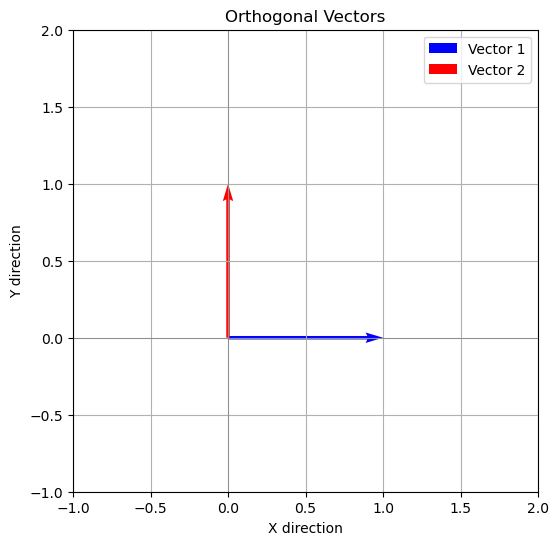

In [11]:
import matplotlib.pyplot as plt

# Create the vectors
vector_x = [1, 0]
vector_y = [0, 1]

# Plot the vectors
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, vector_x[0], vector_x[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector 1')
plt.quiver(0, 0, vector_y[0], vector_y[1], angles='xy', scale_units='xy', scale=1, color='red', label='Vector 2')
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.title('Orthogonal Vectors')
plt.xlabel('X direction')
plt.ylabel('Y direction')
plt.grid(True)
plt.legend()
plt.show()


Here, we see that a change in the first vector is not associated with a change in the second vector. In fact, you could move as far as you would like in the y-direction, and it never changes your location in the x direction. So the variance of one vector is not correlated with the variance in the other vector. So we can see that intuitively, but what does that mean in terms of math? Well vector one is:

$$
\mathbf{v_1} = \begin{bmatrix}
1 \\
0
\end{bmatrix}
$$

And the other is:


$$
\mathbf{v_2} = \begin{bmatrix}
0 \\
1
\end{bmatrix}
$$



To find the dot product of these two vectors, we multiply corresponding entries and sum the results:

$$
\mathbf{v_1} \cdot \mathbf{v_2} = \begin{bmatrix}
1 \\
0
\end{bmatrix} \cdot \begin{bmatrix}
0 \\
1
\end{bmatrix}
= (1 \times 0) + (0 \times 1) = 0 + 0 = 0
$$

Since the dot product is zero, this confirms that the vectors are orthogonal. In mathematical terms, orthogonal vectors have a dot product of zero, which means they are perpendicular to each other in the vector space.


This means that if variance in one variable is uncorrelated with variance in other variable, then the dot product is 0. So how does that help us? Well going back to our equation.



$$(x'x){-1}(x'y - x'\epsilon)= \hat{\beta} $$

If our the variance of our input is not correlated with our errors, that would mean that $x$ is orthogonal with $\epsilon$, which means that $x'\epsilon=0$, which means that:

$$(x'x){-1}(x'y - x'\epsilon)= \hat{\beta} \implies (x'x){-1}(x'y - 0)= \hat{\beta}  \implies (x'x){-1}x'y= \hat{\beta}  $$


And and since we said that without any error terms that the true causal influence is:

$$(x'x)^{-1}x'y=\beta$$

And

$$\hat{\beta}=(x'x){-1}x'y$$

This means that if x and epsilon are uncorrelated, then our estimate equals the actual  value:


$$\hat{\beta}=\beta=(x'x){-1}x'y$$

# Notes for next

- Show this works in the linear case (and how that generalizes to non-linear functional forms)

- Demonstrate OLS and that OLS is BLUE (Gauss-Markov)

- Use graphs as demonstrations. Can dovetail with the previous lecture.

# Generalizing to non-linear functional forms



We can have non-linear relationships in terms of x....in fact this is one of the assumptions. But even this can be written in a single equation, and so can be represented as a system of lienar equations.


### Generalizing to Non-Linear Functional Forms

Ordinary Least Squares (OLS) regression can model non-linear relationships between the dependent and independent variables by transforming the non-linear terms into linear ones. For example, even though the relationship between \( y \) and \( x \) may be non-linear, we can still represent it in a linear regression framework. This is possible because we can rewrite the non-linear equation in a form that allows us to use OLS.

For instance, if we have a quadratic relationship, where \( y = \beta_0 + \beta_1 x + \beta_2 x^2 \), we can treat \( x \) and \( x^2 \) as separate explanatory variables. Thus, the equation remains linear in terms of the parameters \( \beta_0 \), \( \beta_1 \), and \( \beta_2 \). This allows us to apply OLS regression techniques to estimate the parameters, even though the relationship between \( y \) and \( x \) is non-linear.

### Example: Plotting \( x^2 \) from \( x=0 \) to \( x=1 \)

Below is the code to plot \( x^2 \) using Python with matplotlib:


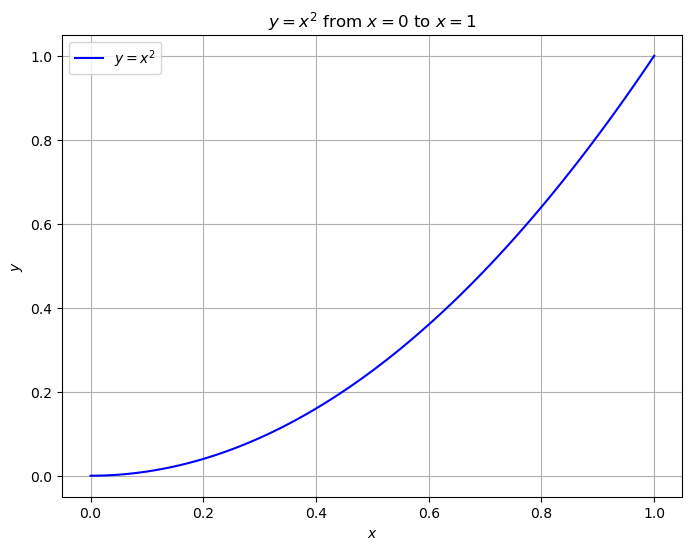

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of x
x = np.linspace(0, 1, 100)

# Define the function y = x^2
y = x ** 2

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='$y = x^2$', color='blue')
plt.title('$y = x^2$ from $x=0$ to $x=1$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.show()